## all using Planck15 cosmo + EH98 transfer model + Carroll92 growth factor

In [2]:
from hmf import MassFunction
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mf = MassFunction()
km = 1.e5; G = 6.67e-8;
h = .677; Mpc = 3.e24; Ms = 2.e33
3.e4*(km/Mpc)**2/(8*np.pi*G)

1.98844256736501e-29

In [3]:
# help(MassFunction)

In [4]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10,
 'Mmax': 15,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [5]:
Msun = 2.e33; h=.677; Mpc = 3.e24
mf.mean_density0 # in Ms hubble**2 / Mpc**3
print(mf.mean_density0*Ms*(h*h)/pow(Mpc,3), 1.9e-29*(h**2))
# print(1.9e-29*(h**2))

2.897403598881738e-30 8.708251e-30


In [6]:
rho_0 = mf.mean_density0*Ms*(h*h)/pow(Mpc,3)
G = 6.67e-8; H0 = 67.7*1.e5/3.e24
3.*(H0**2)/(8*np.pi*G)*.307

2.7978779429155605e-30

## halo mass function: 
### halo numbers in $d\log_{10} m =1$ range

10000 0.0001
11.0
9.872e-04


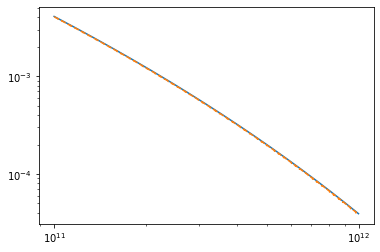

In [7]:
zz = 6
dlog10m = 0.0001
log10Mmin = 11+np.log10(h)
log10Mmax = 12+np.log10(h)
mf= MassFunction(hmf_model='ST',transfer_model='EH',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
x, y = mf.m/h,mf.dndlog10m*h**3
print(len(x),mf.dlog10m)
plt.plot(x,y)

# mf= MassFunction(hmf_model='ST',transfer_model='CAMB',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
# x, y = mf.m/h,mf.dndlog10m*h**3
# print(len(x),mf.dlog10m)
# plt.plot(x,y,alpha=.5)

T = ascii.read('../data/dnSTdM_z6cpp.txt', delimiter=' ')
plt.loglog(T['M'], T['n_ST'], '--', label=str(zz)+'_cpp');

plt.xscale('log'); plt.yscale('log')

print('{0:.1f}'.format(np.log10(x[0])))
print('{0:.3e}'.format(np.sum(y*mf.dlog10m)))
# mass ranges: [11,12,13(to 14 or 15)]
# halo numbers: [9.87e-4, 6.15e-6, 8.92e-10]

## Power spectrum $P\propto \rm{growth~factror}^2 $, $P\propto \sigma_8 $ 

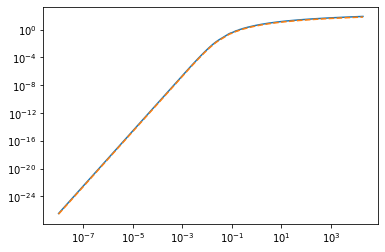

In [18]:
# depending on transfer model; sigma8 is normalization 
mf= MassFunction(hmf_model='ST',transfer_model='EH',z=10,sigma_8=1.,growth_model='Carroll1992')
plt.loglog(mf.k, mf.delta_k/mf.growth_factor**2*.8159/mf.sigma_8)
mf= MassFunction(hmf_model='ST',transfer_model='EH',z=0 ,growth_model='Carroll1992')
plt.loglog(mf.k, mf.delta_k,'--')

T = Table([mf.k*h, mf.delta_k], names=['k_Mpc', 'Delta_k'])
ascii.write(T,'../data/hmf_Pk.dat',overwrite=True)

## $\sigma^2(M)$ v.s. M

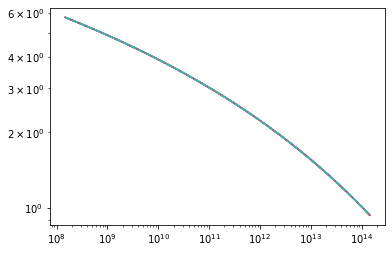

In [22]:
# sigma^2 is P(k) integration; propto sigma8
for zz in np.arange(0.,5.,1.):
    mf= MassFunction(hmf_model='ST',transfer_model='EH',z=zz, Mmin=8, Mmax=14,growth_model='Carroll1992')
    x, y = mf.m/h, mf.sigma/mf.growth_factor
    plt.loglog(x,y)

# Tcpp = ascii.read('sigmaM.txt', delimiter=' ')
# plt.loglog(Tcpp['Mass'],Tcpp['sigma'],'--')

# -- change cosom parameters here: passing cosmo ensured
for zz in np.arange(0.,5.,1.):
    mf= MassFunction(hmf_model='ST',sigma_8=.8,transfer_model='EH',z=zz, Mmin=8, Mmax=14,growth_model='Carroll1992')
    x, y = mf.m/h, mf.sigma/mf.growth_factor
    plt.loglog(x,y*.8159/.8,'--')

plt.show()

## growth factor: Carroll 1992 growth factor v.s. z

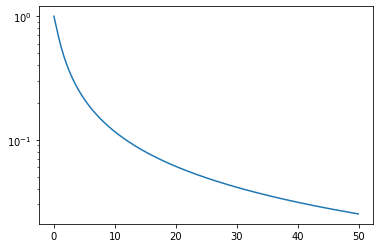

In [23]:
# # from Jdist.cpp
# Tcpp = ascii.read('growth_factor.txt', names=['z', 'Dz'], guess=False,delimiter=' ')
# plt.plot(Tcpp['z'],Tcpp['Dz'],'--')

zs = []; Dzs = []
for zz in np.arange(0.,50,.1):
    mf= MassFunction(z=zz,hmf_model='ST',transfer_model='EH',Mmin=8, Mmax=14,growth_model='Carroll1992')
    zs.append(zz); Dzs.append(mf.growth_factor)
T = Table([zs, Dzs], names=['z', 'Dz'])
plt.plot(T['z'],T['Dz'])
plt.yscale('log')
plt.show()